# Proyek Analisis Data : E-Commerce Public Dataset
- **Nama:** Muhamad Nafal Hisyam
- **Email:** nafalhisyam14@gmail.com
- **ID Dicoding:** m_nafal_hisyam

#Menentukan Pertanyaan Bisnis









*   Produk apa yang paling banyak dan paling sedikit terjual?
*   Bagaimana demografi pelanggan?
*   Bagaimana demografi penjual?
*   Apa saja metode pembayaran yang paling banyak dilakukan?



#Import Library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data Wrangling

##Gathering Data

In [5]:
customer_df = pd.read_csv("/content/drive/MyDrive/dataset/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
order_item_df = pd.read_csv('/content/drive/MyDrive/dataset/order_items_dataset.csv')
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_payment_df = pd.read_csv('/content/drive/MyDrive/dataset/order_payments_dataset.csv')
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
order_review_df = pd.read_csv('/content/drive/MyDrive/dataset/order_reviews_dataset.csv')
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
order_df = pd.read_csv('/content/drive/MyDrive/dataset/orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
product_category_df = pd.read_csv('/content/drive/MyDrive/dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
product_df = pd.read_csv('/content/drive/MyDrive/dataset/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
seller_df = pd.read_csv('/content/drive/MyDrive/dataset/sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


##Assessing Data

melihat info dari masing-masing data

In [14]:
from re import S
print('\n', customer_df.info())
print('\n', geolocation_df.info())
print('\n', order_df.info())
print('\n', order_payment_df.info())
print('\n', order_review_df.info())
print('\n', order_df.info())
print('\n', product_category_df.info())
print('\n', product_df.info())
print('\n', seller_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

mengecek apakah ada data null atau missing value pada setiap data frame

In [15]:
print('\n jumlah data null pada customer', customer_df.isnull().sum())
print('\n jumlah data null pada geolocation', geolocation_df.isnull().sum())
print('\n jumlah data null pada order item', order_item_df.isnull().sum())
print('\n jumlah data null pada order payment', order_payment_df.isnull().sum())
print('\n jumlah data null pada order review', order_review_df.isnull().sum())
print('\n jumlah data null pada order', order_df.isnull().sum())
print('\n jumlah data null pada product category', product_category_df.isnull().sum())
print('\n jumlah data null pada produk', product_df.isnull().sum())
print('\n jumlah data null pada seller', seller_df.isnull().sum())


 jumlah data null pada customer customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 jumlah data null pada geolocation geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

 jumlah data null pada order item order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 jumlah data null pada order payment order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 jumlah data null pada order review review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_me

mengecek apakah ada duplikasi data pada tiap data frame

In [16]:
print("\n Jumlah duplikasi data pada customer : ", customer_df.duplicated().sum())
print("\n Jumlah duplikasi data pada geolocation : ", geolocation_df.duplicated().sum())
print("\n Jumlah duplikasi data pada order item: ", order_item_df.duplicated().sum())
print("\n Jumlah duplikasi data pada order payment : ", order_payment_df.duplicated().sum())
print("\n Jumlah duplikasi pada order review : ", order_review_df.duplicated().sum())
print("\n Jumlah duplikasi data pada order : ", order_df.duplicated().sum())
print("\n Jumlah duplikasi data pada product category : ", product_category_df.duplicated().sum())
print("\n Jumlah duplikasi data pada product : ", product_df.duplicated().sum())
print("\n Jumlah duplikasi data pada seller : ", seller_df.duplicated().sum())


 Jumlah duplikasi data pada customer :  0

 Jumlah duplikasi data pada geolocation :  261831

 Jumlah duplikasi data pada order item:  0

 Jumlah duplikasi data pada order payment :  0

 Jumlah duplikasi pada order review :  0

 Jumlah duplikasi data pada order :  0

 Jumlah duplikasi data pada product category :  0

 Jumlah duplikasi data pada product :  0

 Jumlah duplikasi data pada seller :  0


memeriksa parameter statistik pada tiap data frame

In [17]:
print('\n describe data customer : \n', customer_df.describe(include='all'))
print('\n describe data geolocation : \n', geolocation_df.describe(include='all'))
print('\n describe data order item : \n', order_item_df.describe(include='all'))
print('\n describe data order payment : \n', order_payment_df.describe(include='all'))
print('\n describe data order review : \n', order_review_df.describe(include='all'))
print('\n describe data order : \n', order_df.describe(include='all'))
print('\n describe data product category : \n', product_category_df.describe(include='all'))
print('\n describe data product : \n', product_df.describe(include='all'))
print('\n describe data seller : \n', seller_df.describe(include='all'))


 describe data customer : 
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix c

##Cleaning Data

menghilangkan duplikasi data

In [18]:
geolocation_df.drop_duplicates(inplace = True)
print('jumlah duplikasi data pada data frame geolocation : ', geolocation_df.duplicated().sum())

jumlah duplikasi data pada data frame geolocation :  0


menangani missing value pada data frame order review

order_review_df[order_review_df.review_comment_title.isna()] akan menampilkan baris data yang mengandung missing value pada kolom review_comment_title.

In [19]:
order_review_df[order_review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Musabab kolom review_comment_title merupakan kolom kategorik, kita akan menggunakan nilai yang dominan sebagai pengganti missing value tersebut. Gunakanlah method value_counts()untuk mengidentifikasi nilai yang dominan.

In [20]:
order_review_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [21]:
order_review_df.fillna(value="Recomendo", inplace=True)
order_review_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

menangani missing value pada data frame produk

In [22]:
print('jumlah data null pada produk', product_df.isnull().sum())

jumlah data null pada produk product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [23]:
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [24]:
product_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [25]:
product_df.fillna(value="cama_mesa_banho", inplace=True)
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

menangani missing value pada data frame order


In [26]:
print('\n jumlah data null pada order', order_df.isnull().sum())


 jumlah data null pada order order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [27]:
print('\n jumlah data null pada order', order_df.isnull().sum())


 jumlah data null pada order order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


mengubah tipe data

In [28]:
print('', customer_df.info())
print('', geolocation_df.info())
print('', order_item_df.info())
print('', order_payment_df.info())
print('', order_review_df.info())
print('', order_df.info())
print('', product_category_df.info())
print('', product_df.info())
print('', seller_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  o

In [29]:
datetime_columns = ["order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

In [30]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


In [31]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_review_df[column] = pd.to_datetime(order_review_df[column])

In [32]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#EDA

##Explore customer_df

In [33]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [34]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [35]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

pelanggan kita paling banyak berada di kota sao paulo, rio de janeiro, dan belo horizonte.

##Explore order_df

In [36]:
order_df.describe(include='all')

<ipython-input-36-5c1ebaa3c072>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include='all')
<ipython-input-36-5c1ebaa3c072>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include='all')
<ipython-input-36-5c1ebaa3c072>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include='all')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,NaN,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [37]:
delivery_time = order_df["order_delivered_customer_date"] - order_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time/86400)

order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
90920,00f98eaeddb9debc8df8cb27e08216d4,f6d650f5127f08c4ed7c4f596c0f9cb5,delivered,2017-10-18 17:40:28,2017-10-20 02:56:27,2017-10-20 20:32:02,2017-10-23 16:32:44,2017-10-30,3.0
11353,a4423627568451619a53fb219d9ab5e9,f9d7fe8e98e56e91c5a8eb448df9e23d,invoiced,2018-05-18 15:10:08,2018-05-18 15:37:19,NaT,NaT,2018-06-06,NaN
77609,c96826f70a2d5d38af58a490427b9333,5de937c20f9f89eceb3dc4b057949435,delivered,2018-01-05 21:06:01,2018-01-05 21:17:22,2018-01-08 18:56:33,2018-01-10 17:17:46,2018-01-23,2.0
76990,7210d7fc318b9dc764bf75da0bd6c74c,877635a3045c4c3e150f73937bdb0fa9,delivered,2017-12-30 16:49:38,2017-12-30 17:06:51,2018-01-04 10:34:29,2018-01-06 13:56:03,2018-01-18,2.0
72911,ba6a857fd86ca12d49fd79c0d354aa0e,598d3839f11db213a5be6bcb757bc3bc,delivered,2017-12-07 05:43:31,2017-12-07 05:52:24,2017-12-07 19:03:49,2017-12-20 19:29:20,2018-01-02,13.0


In [38]:
order_df.describe(include='all')

<ipython-input-38-5c1ebaa3c072>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include='all')
<ipython-input-38-5c1ebaa3c072>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include='all')
<ipython-input-38-5c1ebaa3c072>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include='all')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96475.000000
unique,99441,99441,8,98875,90733,81018,95664,459,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,NaN
freq,1,1,96478,3,9,47,3,522,NaN
first,NaN,NaN,NaN,NaN,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.292314
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.776671
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


berdasarkan hasil tersebut, diketahui bahwa rata-rata waktu pengiriman 9 hari

##Explore order_df & customer_df

In [39]:
order_customer_df = pd.merge(
    left = order_df,
    right = customer_df,
    how = 'left',
    left_on = 'customer_id',
    right_on = 'customer_id',

)
order_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [40]:
order_customer_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [41]:
order_customer_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [42]:
customer_id_in_order_df = order_df.customer_id.tolist()
customer_df["status"] = customer_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_order_df else "Non Active")
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
46145,da324dd532afe70ec2415aa1150e6e9f,cfa40788672ff3c42c35e723bc83c19b,35622,paineiras,MG,Active
12741,a2c32079da05c60d8e39eee66b12530c,5acb44e8f0ffc5e73a4166f51eede9d4,1106,sao paulo,SP,Active
43341,c009189a0fce48a8844dd35feca6025e,81f5afe83c873351c6089ce0ded7dc2e,31015,belo horizonte,MG,Active
12200,2370fd2f366b76f9fa59768ed7dbcc25,cfb9250ad7da3bac88843a57f83e93bc,21350,rio de janeiro,RJ,Active
85709,1189440e2928a16f63c04df90266e8b8,f06b8dcbe6c7589b7a2e95bead45142e,35931,joao monlevade,MG,Active


In [43]:
customer_df.groupby(by='status').customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

berdasarkan informasi di atas diperoleh jumlah pelanggan yang berstatus active

##Explore order_payment & order_review

In [44]:
order_payment_review_df = pd.merge(
    left = order_payment_df,
    right = order_review_df,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
order_payment_review_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Recomendo,Recomendo,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Recomendo,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Recomendo,Recomendo,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Recomendo,Recomendo,2017-12-21,2017-12-22 01:10:39


In [45]:
order_payment_review_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending = False).head()

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

informasi di atas terkait jumlah order berdasarkan alat pembayaran

##Merge order_customer_df & order_payment_review_df

In [46]:
customers_df = pd.merge(
    left = order_customer_df,
    right = order_payment_review_df,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,Recomendo,Recomendo,2018-08-18,2018-08-22 19:07:58


##Eksplore product_category_df & order_item_df & product_category_df

In [47]:
orderitem_product_df = pd.merge(
    left=product_df,
    right=order_item_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orderitem_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [48]:
orderitem_product_df.sort_values(by='price', ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


In [49]:
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [50]:
orderitem_product_category_df = pd.merge(
    left = product_category_df,
    right = orderitem_product_df,
    how = 'left',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)
orderitem_product_category_df.head()

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.9,15.79
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.9,27.22
2,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.9,38.18
3,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.9,16.11
4,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.9,19.64


In [51]:
orderitem_product_category_df.sort_values(by='price', ascending=False)

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
56093,utilidades_domesticas,housewares,489ae2aa008f021502940f251d4cce7f,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
111222,pcs,computers,69c590f7ffc7bf8db97190b6cb6ed62e,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
109846,artes,art,1bdf5e6731585cf01aa8169c7028d6ad,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
89450,eletroportateis,small_appliances,a6492cc69376c469ab6f61d8f44de961,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
89226,eletroportateis,small_appliances,c3ed642d592594bb648ff4a04cee2747,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,beleza_saude,health_beauty,05b515fdc76e888aada3c6d66c201dff,45.0,231.0,3.0,800.0,21.0,4.0,15.0,8272b63d03f5f79c56e9e4120aec44ef,4,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
5261,beleza_saude,health_beauty,05b515fdc76e888aada3c6d66c201dff,45.0,231.0,3.0,800.0,21.0,4.0,15.0,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
96928,construcao_ferramentas_construcao,construction_tools_construction,8a3254bee785a526d548a81a9bc3c9be,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30
96927,construcao_ferramentas_construcao,construction_tools_construction,8a3254bee785a526d548a81a9bc3c9be,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23


dari data di atas terdapat informasi barang termahal adalah peralatan rumah tangga

##Eksplore order_item_df & seller_df

In [52]:
orderitem_seller_df = pd.merge(
    left = order_item_df,
    right = seller_df,
    how = 'left',
    left_on = 'seller_id',
    right_on = 'seller_id',
)
orderitem_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [53]:
orderitem_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


In [54]:
orderitem_seller_df.groupby(by='seller_state').seller_id.nunique().sort_values(ascending=False).reset_index().head()

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171


##Eksplore product_df & product_category_df

In [55]:
products_df = pd.merge(
    left = product_df,
    right = product_category_df,
    how = 'left',
    left_on = 'product_category_name',
    right_on = 'product_category_name',
)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [56]:
products_df.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False).head()

product_category_name_english
bed_bath_table     3639
sports_leisure     2867
furniture_decor    2657
health_beauty      2444
housewares         2335
Name: product_id, dtype: int64

##Merge orderitem_seller_df & products_df

In [57]:
orderitem_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [58]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [59]:
sellers_df = pd.merge(
    left = products_df,
    right = orderitem_seller_df,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


##Eksplore All Data

In [60]:
all_data = pd.merge(
    left = sellers_df,
    right = customers_df,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id',
)
all_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,...,1.0,debit_card,1.0,18.30,d71da8fd8c6e3adef26be965f065b8a1,5.0,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28,2018-05-04 00:55:02
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,...,1.0,voucher,1.0,265.99,19866247db89845ef558ef19a6c26fcd,5.0,Recomendo,Excelente apontador! Em 3 segundos uma ponta p...,2018-02-17,2018-02-18 23:24:14
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,...,1.0,credit_card,1.0,87.62,32921b4e09c9a19d61fe46ce04231b84,5.0,Recomendo,Recomendo,2018-07-14,2018-07-16 16:20:04
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,...,1.0,credit_card,2.0,121.84,70949d129965fb1ee32aaccec720a19e,1.0,produto divergente,modelo comprado: travesseiro memoria carinho B...,2018-08-07,2018-08-08 11:53:04
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,...,1.0,credit_card,4.0,46.19,74c9c7d0bc153bbbc92e4c1597b8ba55,5.0,Recomendo,Recomendo,2018-04-17,2018-04-18 04:29:47


In [61]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     118310 non-null  object        
 1   product_category_name          118310 non-null  object        
 2   product_name_lenght            118310 non-null  object        
 3   product_description_lenght     118310 non-null  object        
 4   product_photos_qty             118310 non-null  object        
 5   product_weight_g               118310 non-null  object        
 6   product_length_cm              118310 non-null  object        
 7   product_height_cm              118310 non-null  object        
 8   product_width_cm               118310 non-null  object        
 9   product_category_name_english  118285 non-null  object        
 10  order_id                       118310 non-null  object        
 11  

In [62]:
all_data.groupby(by=['customer_city', 'product_category_name_english']).agg({
    'price' : 'sum',
    'freight_value' : 'sum',
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              bed_bath_table                  29.90          16.79
                    computers_accessories           69.90          20.98

[25328 rows x 2 columns]

In [63]:
all_data.groupby(by='product_category_name_english').agg({
    'order_id' : 'nunique',
    'review_score' : ['min', 'max']
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

In [64]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41375,7649963.24
RJ,12762,2781238.85
MG,11544,2335417.96
RS,5432,1155433.49
PR,4998,1069785.29
BA,3358,800064.62
SC,3612,788484.24
GO,2007,518178.14
DF,2125,436206.50


#Visualization & Explanatory Analysis

##Pertanayan 1 : Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [65]:
sum_order_items_df = all_data.groupby(by='product_category_name_english')['product_id'].count().reset_index().sort_values(by = 'product_id', ascending = False)

sum_order_items_df.head()

,product_category_name_english,product_id
7,bed_bath_table,13697
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


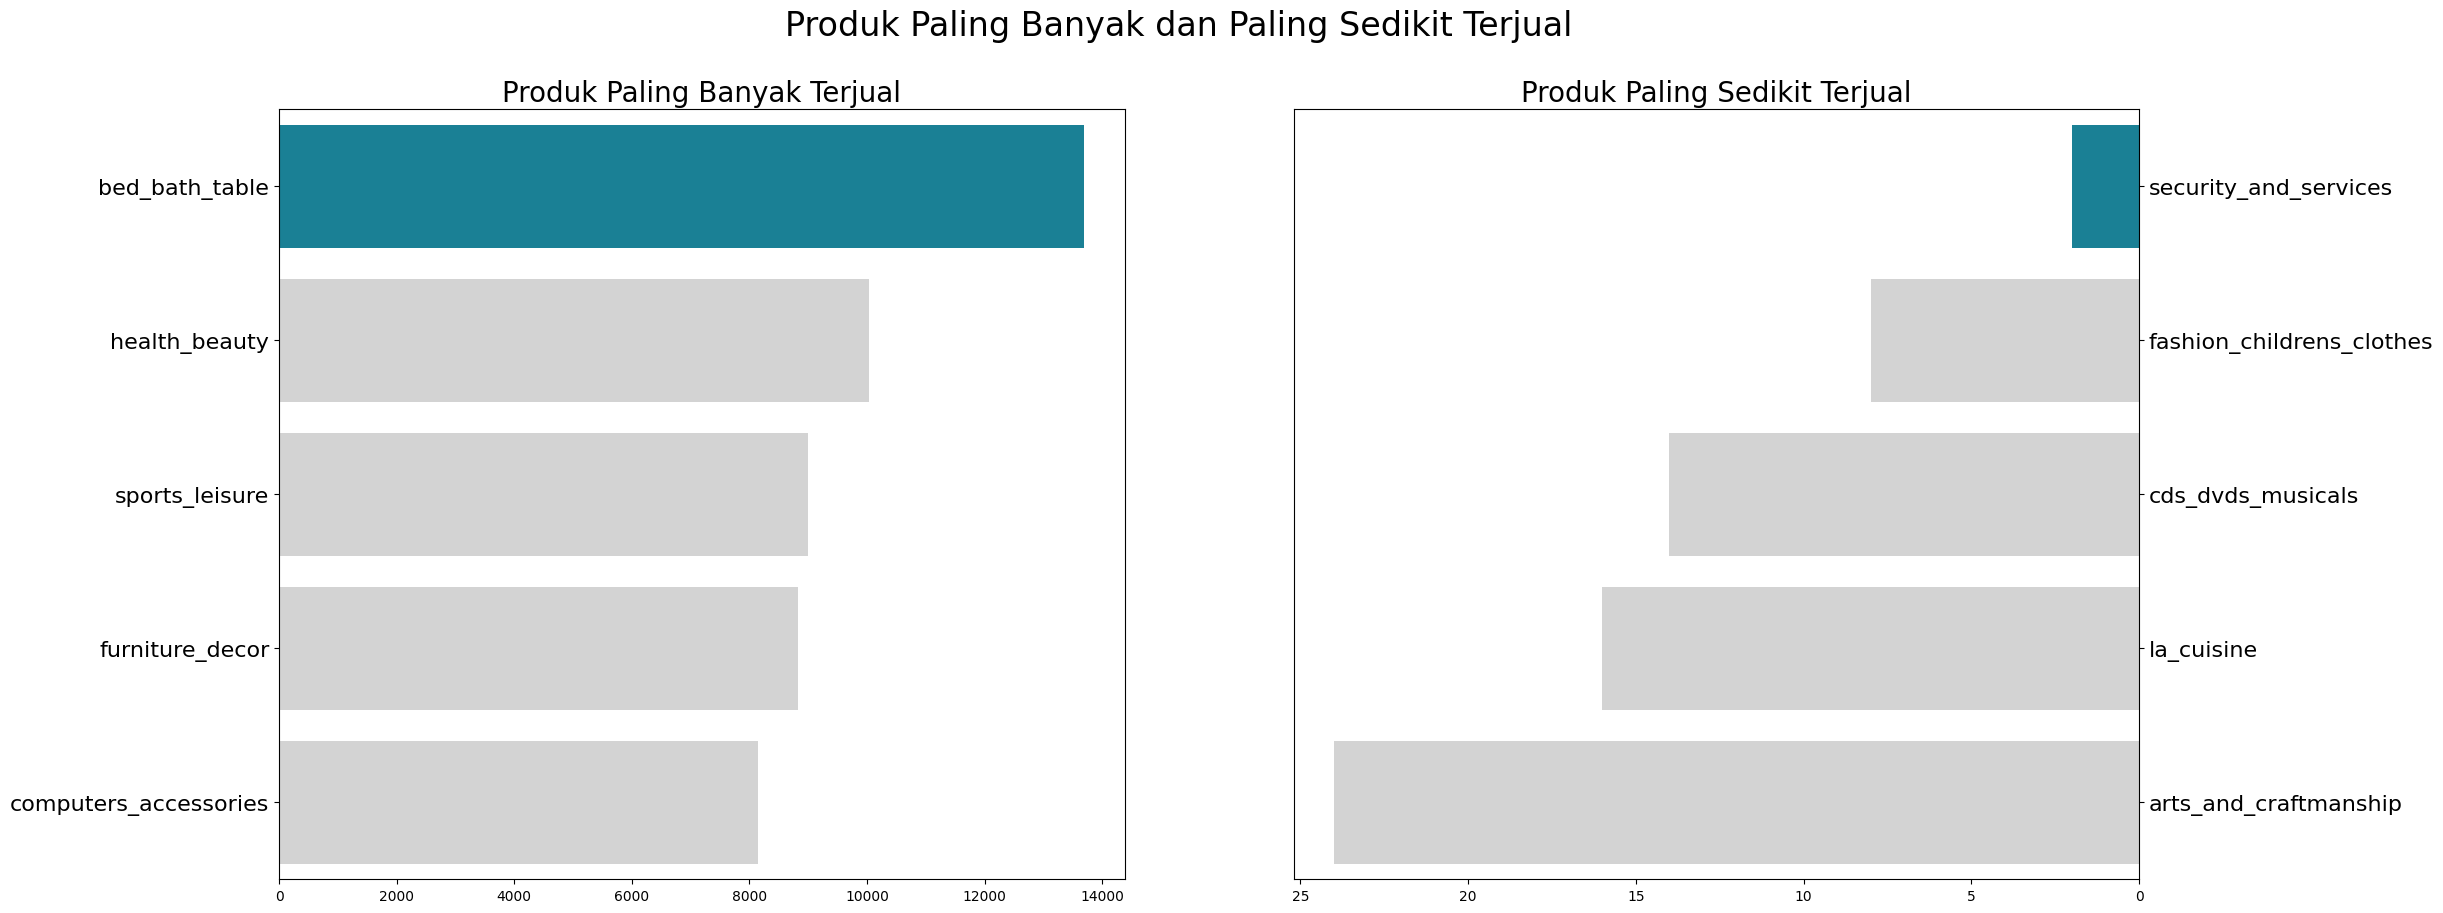

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Paling Banyak Terjual", loc="center", fontsize=20)
ax[0].tick_params(axis ='y', labelsize=16)

sns.barplot(x="product_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])

ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Paling Sedikit Terjual", loc="center", fontsize=20)
ax[1].tick_params(axis='y', labelsize=16)

plt.suptitle("Produk Paling Banyak dan Paling Sedikit Terjual", fontsize=24)
plt.show()

##Pertanyaan 2 : Bagaimana Demografi Pelanggan?

In [67]:
cust_bycity_df = all_data.groupby(by='customer_city')['customer_id'].count().reset_index().sort_values(by = 'customer_id', ascending = False)

cust_bycity_df.head()

,customer_city,customer_id
3588,sao paulo,18727
3147,rio de janeiro,8261
452,belo horizonte,3274
557,brasilia,2484
1141,curitiba,1816


Text(0, 0.5, '')

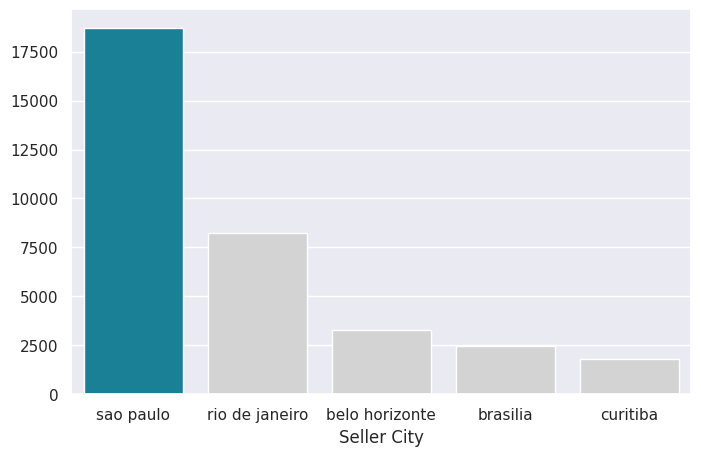

In [68]:
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(8, 5))

sns.set(style = 'darkgrid')
sns.barplot(x = 'customer_city', y = 'customer_id', data = cust_bycity_df.sort_values(by="customer_id", ascending=False).head(5), palette = colors)

plt.xlabel('Seller City')
plt.ylabel(None)

Text(0.5, 0, 'Customer State')

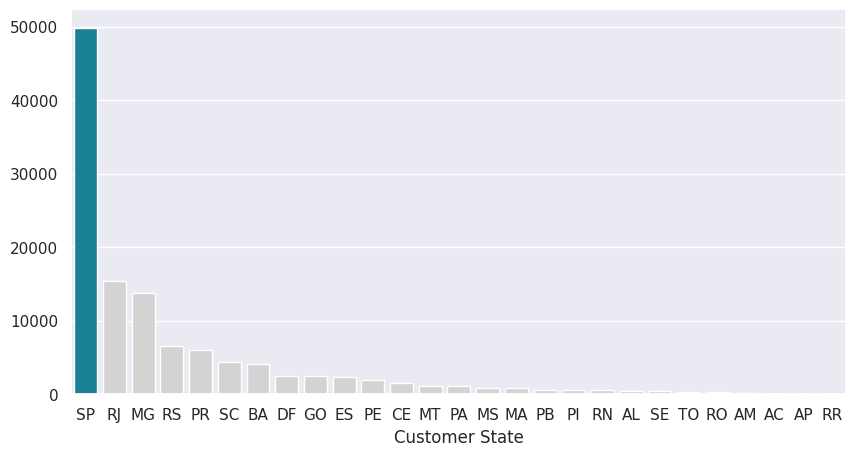

In [69]:
cust_bystate_df = all_data['customer_state'].value_counts().sort_values(ascending=False)

most_common_score = cust_bystate_df.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=cust_bystate_df.index,
            y=cust_bystate_df.values,
            order=cust_bystate_df.index,
            palette=["#068DA9" if score == most_common_score else "#D3D3D3" for score in cust_bystate_df.index]
            )
plt.xlabel('Customer State')

##Pertanyaan 3 : Bagaimana demografi seller?

In [70]:
seller_bycity_df = all_data.groupby(by='seller_city')['seller_id'].count().reset_index().sort_values(by = 'seller_id', ascending = False)
seller_bycity_df.head(7)

,seller_city,seller_id
517,sao paulo,29293
227,ibitinga,8373
159,curitiba,3161
483,santo andre,3149
507,sao jose do rio preto,2693
64,belo horizonte,2688
450,rio de janeiro,2535


Text(0, 0.5, '')

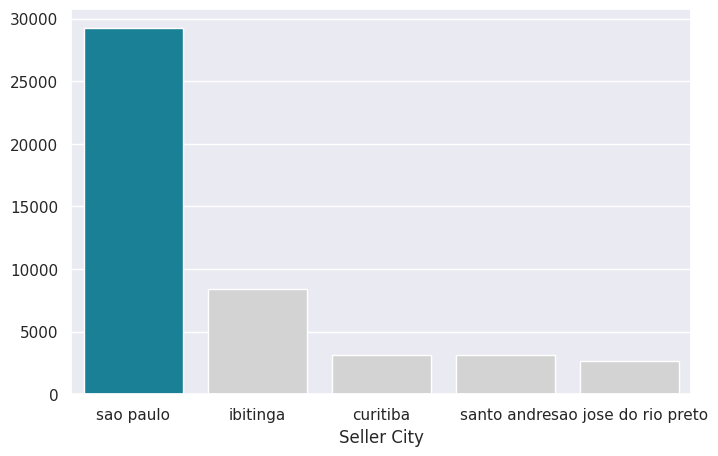

In [71]:
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(8, 5))

sns.barplot(x = 'seller_city', y = 'seller_id', data=seller_bycity_df.sort_values(by="seller_id", ascending=False).head(5), palette = colors)

plt.xlabel('Seller City')
plt.ylabel(None)

Text(0.5, 0, 'Seller State')

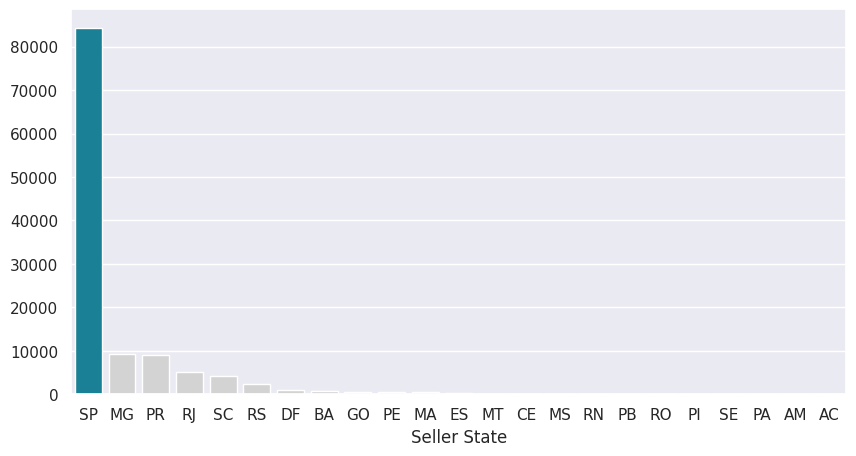

In [72]:

seller_bystate_df = all_data['seller_state'].value_counts().sort_values(ascending=False)

most_common_score = seller_bystate_df.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=seller_bystate_df.index,
            y=seller_bystate_df.values,

            palette=["#068DA9" if score == most_common_score else "#D3D3D3" for score in seller_bystate_df.index]
            )
plt.xlabel('Seller State')

##Pertannyaan 4 : Apa saja metode pembayaran yang paling banyak digunakan?

Text(0, 0.5, 'Jumlah Transaksi')

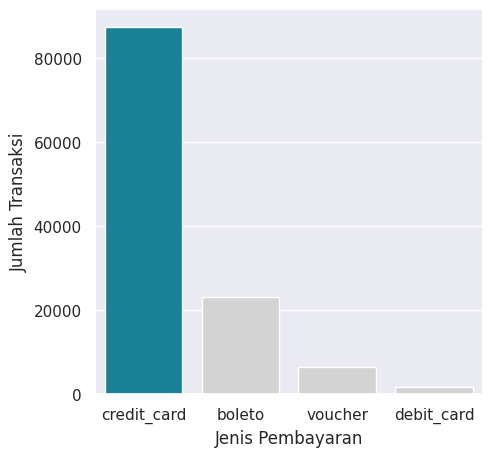

In [73]:
type_payment_df = all_data['payment_type'].value_counts().sort_values(ascending=False)

most_common_score = type_payment_df.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(5, 5))
sns.barplot(x=type_payment_df .index,
            y=type_payment_df .values,
            order=type_payment_df .index,
            palette=["#068DA9" if score == most_common_score else "#D3D3D3" for score in type_payment_df.index]
            )

plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah Transaksi')



#Convert all_data to csv

In [74]:
all_data.to_csv('all_data.csv', index = False)

#Conclusion



*   **Produk apa yang paling banyak dan paling sedikit terjual?**

    Berdasarkan dari hasil visualisasi di atas, bahwa bed_bath_table adalah produk yang paling banyak terjual, dan security_and_service adalah produk yang sedikit terjual




*   **Bagaimana demografi pelanggan?**

    Berdasarkan hasil dari visualisasi di atas, pelanggan terbanyak berasal dari kota Sao Paulo dan berasal dari negara SP






*   **Bagaimana demografi penjual?**

    Berdasarkan hasil dari visualisasi di atas, penjual terbanyak berasal dari kota Sao Paulo dan negara SP





*   **Apa saja metode pembayaran yang paling banyak digunakan?**

  Berdasarkan hasil dari visualisasi data di atas, metode credit card adalah metode pembayaran yang paling banyak dilakukan
